In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pathlib

In [6]:
# Load the CSV file to examine its content
file_path = pathlib.Path('~/Developer/code/patient-note-alignment/reports/data/small-benchmark.csv').expanduser()
df = pd.read_csv(file_path, delimiter=';')

# Display the first few rows and the column names to understand the structure
df.head(), df.columns

(            Start Time Duration                            Run ID  \
 0  2024-09-04 22:28:10  14.1min  5df6b000b7bf41b59c11a6092605be02   
 1  2024-09-04 22:14:15  13.9min  d22e7e976e614a2d8d69e29198fe6be7   
 2  2024-09-04 22:00:20  13.9min  a880dabd2048421ebab688ee0567aa59   
 3  2024-09-04 21:24:53  13.9min  638463b003c349c981079eb301470de2   
 4  2024-09-04 21:10:33  14.3min  2bc739e3028c405491846189106ef024   
 
                                       Name Source Type  \
 0  Meta-Llama-3.1-8B-Instruct-loft-50shots       LOCAL   
 1  Meta-Llama-3.1-8B-Instruct-loft-50shots       LOCAL   
 2  Meta-Llama-3.1-8B-Instruct-loft-50shots       LOCAL   
 3  Meta-Llama-3.1-8B-Instruct-loft-50shots       LOCAL   
 4  Meta-Llama-3.1-8B-Instruct-loft-50shots       LOCAL   
 
                              Source Name User    Status  \
 0  scripts/benchmark_alignment_mlflow.py  amo  FINISHED   
 1  scripts/benchmark_alignment_mlflow.py  amo  FINISHED   
 2  scripts/benchmark_alignment_mlflow.py 

In [ ]:
df.loc[df['exact_match/mean'] > 1, 'exact_match/mean'] = df['exact_match/mean'] / 1000.0
df.loc[df['exact_match/mean'] > 1]

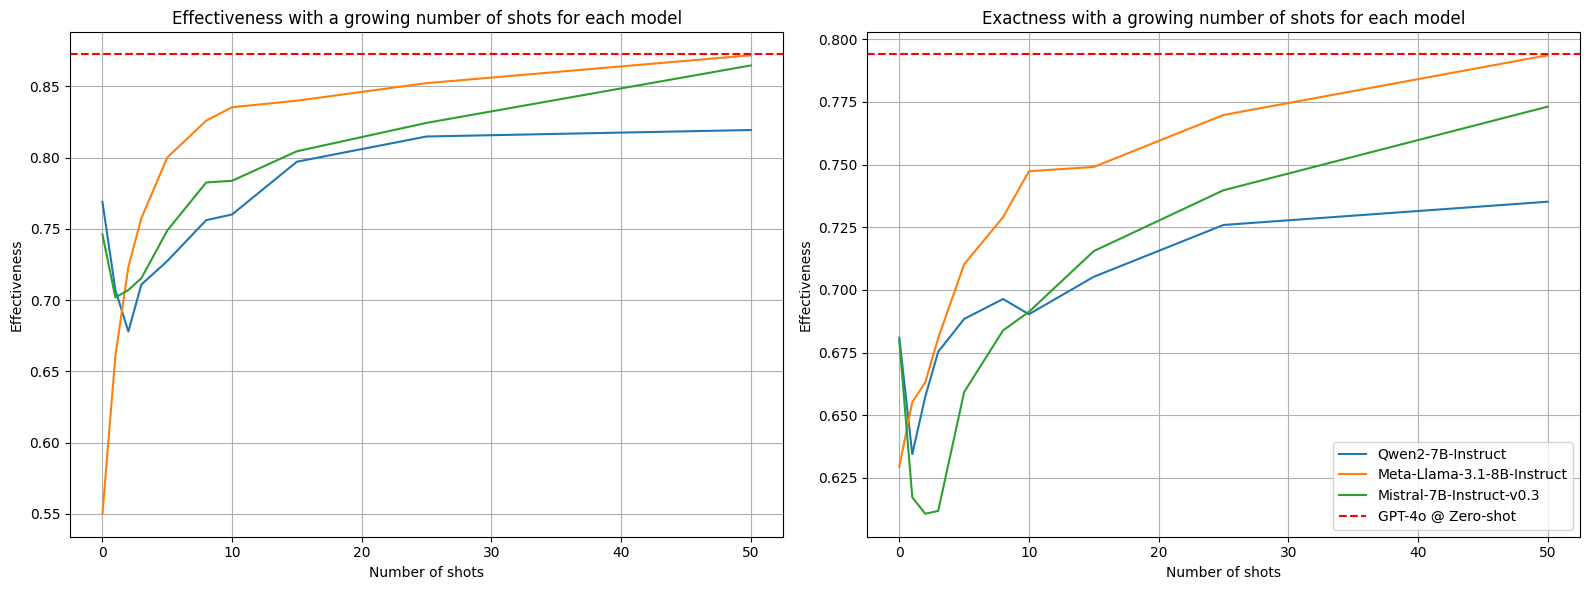

In [22]:
agg_df1 = df.groupby(['num_shots', 'deployment'])['f1_score/mean'].agg(['mean', 'min', 'max']).reset_index()
agg_df2 = df.groupby(['num_shots', 'deployment'])['exact_match/mean'].agg(['mean', 'min', 'max']).reset_index()


models = ["Qwen/Qwen2-7B-Instruct", "meta-llama/Meta-Llama-3.1-8B-Instruct", "mistralai/Mistral-7B-Instruct-v0.3"]

agg_df1 = agg_df1.loc[agg_df1['deployment'].isin(models)]
agg_df2 = agg_df2.loc[agg_df2['deployment'].isin(models)]

# Creating a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the first metric (f1_score/mean) on the first subplot
for deployment in agg_df1['deployment'].unique():
    subset = agg_df1[agg_df1['deployment'] == deployment]
    axes[0].plot(subset['num_shots'], subset['mean'], label=deployment.split("/")[-1])

axes[0].set_xlabel('Number of shots')
axes[0].set_ylabel('Effectiveness')
axes[0].set_title('Effectiveness with a growing number of shots for each model')
axes[0].axhline(y=0.873, color='red', linestyle='--', label='GPT-4o @ Shot 0')
axes[0].grid(True)

# Plotting the second metric (another_metric/mean) on the second subplot
for deployment in agg_df2['deployment'].unique():
    subset2 = agg_df2[agg_df2['deployment'] == deployment]
    axes[1].plot(subset2['num_shots'], subset2['mean'], label=deployment.split("/")[-1])

axes[1].set_xlabel('Number of shots')
axes[1].set_ylabel('Effectiveness')
axes[1].set_title('Exactness with a growing number of shots for each model')
axes[1].axhline(y=0.794, color='red', linestyle='--', label='GPT-4o @ Zero-shot')
axes[1].legend(title=None)
axes[1].grid(True)

# Adjusting layout and displaying the plots
plt.tight_layout()
plt.show()

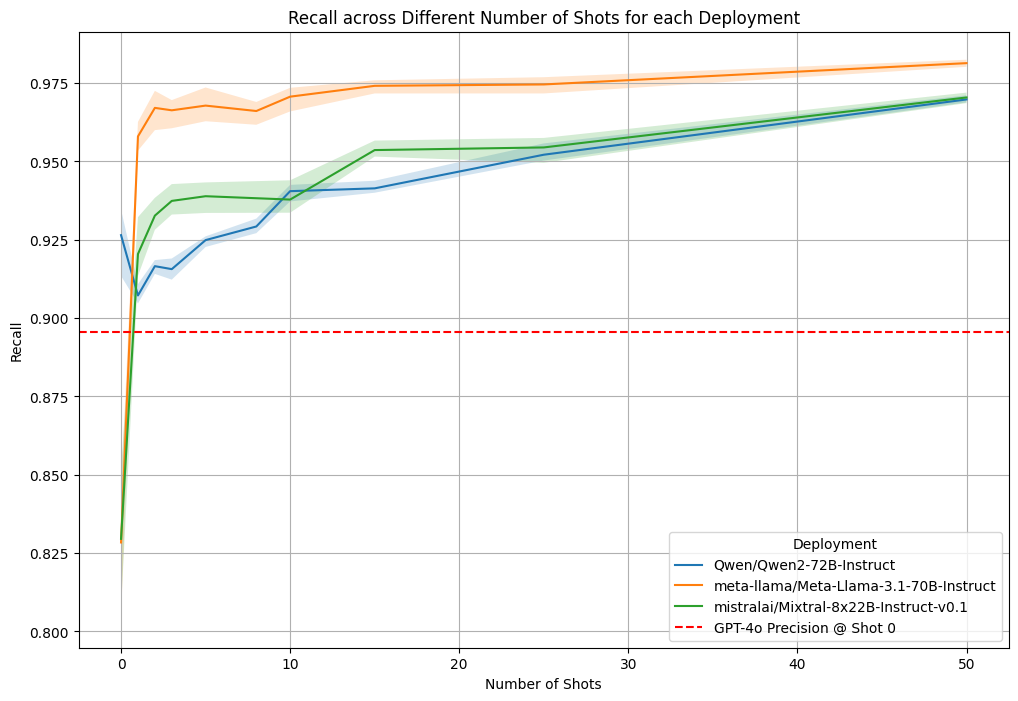

In [24]:
# Aggregating the data to calculate mean, min, and max for precision/mean
agg_df = df.groupby(['num_shots', 'deployment'])['recall/mean'].agg(['mean', 'min', 'max']).reset_index()

# Plotting the line chart with shaded areas
plt.figure(figsize=(12, 8))
for prompt in agg_df['deployment'].unique():
    subset = agg_df[agg_df['deployment'] == prompt]
    plt.plot(subset['num_shots'], subset['mean'], label=prompt)
    plt.fill_between(subset['num_shots'], subset['min'], subset['max'], alpha=0.2)

# Adding horizontal dotted red lines for GPT-4o and GPT-4-turbo
plt.axhline(y=0.8956, color='red', linestyle='--', label='GPT-4o Precision @ Shot 0')

plt.xlabel('Number of Shots')
plt.ylabel('Recall')
plt.title('Recall across Different Number of Shots for each Deployment')
plt.legend(title='Deployment')
plt.grid(True)
plt.show()

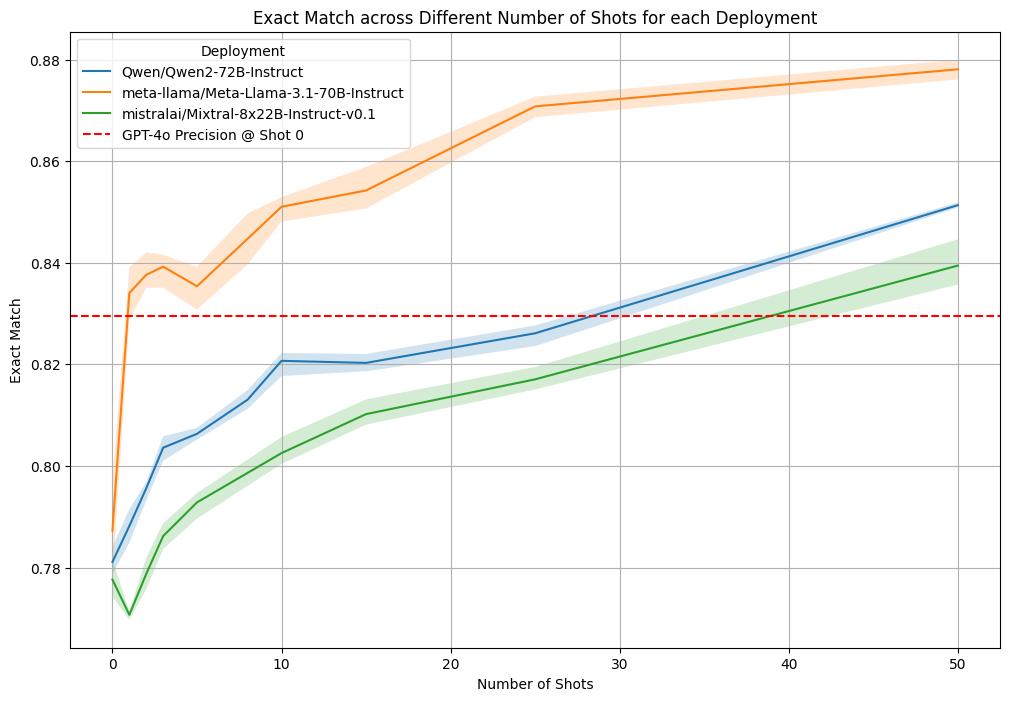

In [25]:
# Aggregating the data to calculate mean, min, and max for precision/mean
agg_df = df.groupby(['num_shots', 'deployment'])['exact_match/mean'].agg(['mean', 'min', 'max']).reset_index()

# Plotting the line chart with shaded areas
plt.figure(figsize=(12, 8))
for prompt in agg_df['deployment'].unique():
    subset = agg_df[agg_df['deployment'] == prompt]
    plt.plot(subset['num_shots'], subset['mean'], label=prompt)
    plt.fill_between(subset['num_shots'], subset['min'], subset['max'], alpha=0.2)

# Adding horizontal dotted red lines for GPT-4o and GPT-4-turbo
plt.axhline(y=0.8296, color='red', linestyle='--', label='GPT-4o Precision @ Shot 0')

plt.xlabel('Number of Shots')
plt.ylabel('Exact Match')
plt.title('Exact Match across Different Number of Shots for each Deployment')
plt.legend(title='Deployment')
plt.grid(True)
plt.show()

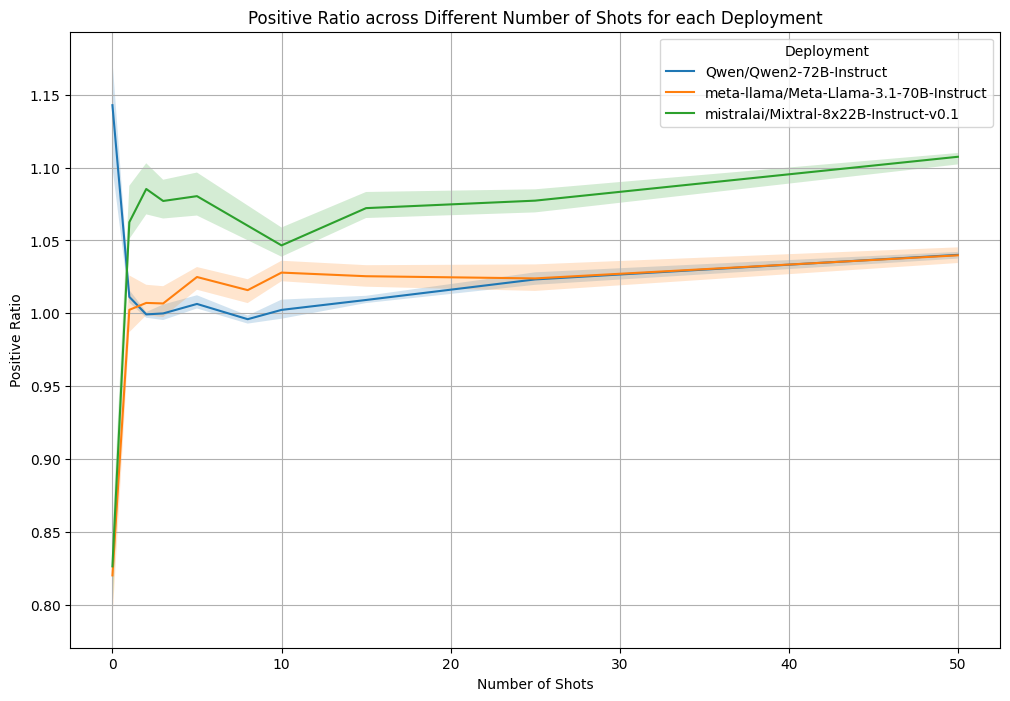

In [26]:
# Aggregating the data to calculate mean, min, and max for precision/mean
agg_df = df.groupby(['num_shots', 'deployment'])['positive_ratio/mean'].agg(['mean', 'min', 'max']).reset_index()

# Plotting the line chart with shaded areas
plt.figure(figsize=(12, 8))
for prompt in agg_df['deployment'].unique():
    subset = agg_df[agg_df['deployment'] == prompt]
    plt.plot(subset['num_shots'], subset['mean'], label=prompt)
    plt.fill_between(subset['num_shots'], subset['min'], subset['max'], alpha=0.2)

plt.xlabel('Number of Shots')
plt.ylabel('Positive Ratio')
plt.title('Positive Ratio across Different Number of Shots for each Deployment')
plt.legend(title='Deployment')
plt.grid(True)
plt.show()

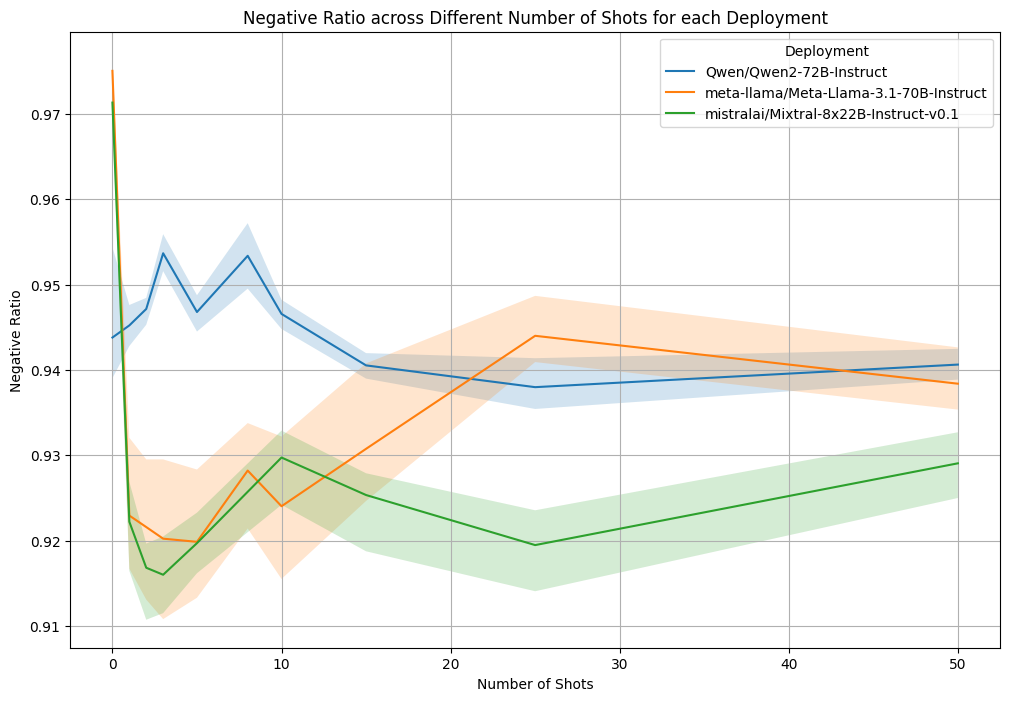

In [27]:
# Aggregating the data to calculate mean, min, and max for precision/mean
agg_df = df.groupby(['num_shots', 'deployment'])['negative_ratio/mean'].agg(['mean', 'min', 'max']).reset_index()

# Plotting the line chart with shaded areas
plt.figure(figsize=(12, 8))
for prompt in agg_df['deployment'].unique():
    subset = agg_df[agg_df['deployment'] == prompt]
    plt.plot(subset['num_shots'], subset['mean'], label=prompt)
    plt.fill_between(subset['num_shots'], subset['min'], subset['max'], alpha=0.2)

plt.xlabel('Number of Shots')
plt.ylabel('Negative Ratio')
plt.title('Negative Ratio across Different Number of Shots for each Deployment')
plt.legend(title='Deployment')
plt.grid(True)
plt.show()